In [1]:
import numpy as np
from typing import List
from matplotlib import pyplot as plt

from lib.Layers import Layer
from lib.Tensor import Tensor

In [2]:
class Dense(Layer):
    def __init__(self, input_dim: int, output_dim: int, lr: float = 0.01):
        self.weights = self.init_weights(input_dim, output_dim) # weights is a matrix of shape (input_dim, output_dim)
        self.bias = self.init_bias(output_dim) # bias is a matrix of shape (1, output_dim)
        self.lr = lr # learning rate
        self.input = None # save input for backward pass
    
    # initialize weights and bias
    def init_weights(self, input_dim: int, output_dim: int) -> 'Tensor':
        arr = np.random.randn(input_dim, output_dim) * 0.01 # initialize weights with small random numbers
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def init_bias(self, output_dim: int) -> 'Tensor':
        arr = np.zeros((1, output_dim)) # initialize bias with zeros of shape (1, output_dim)
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def parameters(self) -> List['Tensor']:
        return [self.weights, self.bias]
    
    # forward pass
    def forward(self, input_data: 'Tensor') -> 'Tensor':
        """
        Take an input tensor, multiply it with the weights and add the bias.
        
        X is a matrix of shape (batch_size, input_dim)
        W is a matrix of shape (input_dim, output_dim)
        b is a matrix of shape (1, output_dim)

        output = X @ W + b, matrix of shape (batch_size, output_dim)
        """
        input_features = input_data.shape[1] # input_dim
        if input_features != self.weights.shape[0]:
            raise RuntimeError(f"Input tensor with {input_features} features should match layer input dim {self.weights.shape[0]}")

        self.input = input_data # save input for backward pass
        #? not sure if i need to handle the case where batch_size = 1, and input_data is a vector
        self.output = input_data @ self.weights + self.bias # matrix multiplication
        return self.output
    
    # backward pass
    def backward(self) -> None:
        """
        Compute and store gradients for weights and biases based on the output_gradient
        coming from the next layer. Then, compute the gradient for the inputs to be
        sent to the previous layer.

        output_gradient is a tensor of shape (batch_size, output_dim)
        """

        if self.output.grad is None:
            raise RuntimeError("No gradient found. You might need to call backward on the loss Tensor first.")
        
        # compute gradient for weights

In [3]:
class Optimizer:
    """
    Base class for all optimizers.
    """
    def __init__(self):
        self.lr = None

    def step(self):
        raise NotImplementedError
    
    def zero_grad(self):
        raise NotImplementedError
    
class SGD(Optimizer):
    """
    Stochastic gradient descent optimizer.
    """
    def __init__(self, params: List['Tensor'], lr):
        self.lr = lr
        self.params = params
    
    def step(self):
        for param in self.params:
            if param.requires_grad:
                param.data = param.data - self.lr * param.grad
                # param.data -= self.lr * param.grad
                param.zero_grad()

    def zero_grad(self):
        for param in self.params:
            if param.requires_grad:
                param.zero_grad()

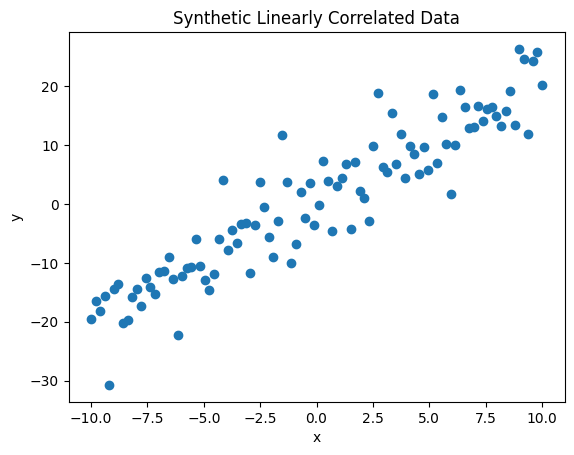

In [4]:
n_samples = 100

x = np.linspace(-10, 10, n_samples) # 100 samples between -10 and 10

# generate y = 2x + 1
y = 2 * x + 1
# add noise
y += np.random.normal(0, 5, n_samples)

# reshape x and y to be column vectors
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [37]:
for epoch in range (10000):
    layer = Dense(1, 1)
    optimizer = SGD([layer.weights, layer.bias], lr=0.01)
    input_data = Tensor(x, requires_grad=True) # convert to Tensor
    out = layer(input_data) # forward pass
    loss = ((out - y) ** 2).sum() # Total Squared Error loss
    loss.backward() # compute gradients
    optimizer.step() # update weights and bias

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.data / n_samples : 0.04f}")

Epoch: 0, Loss:  163.1920
Epoch: 100, Loss:  161.1264
Epoch: 200, Loss:  160.4874
Epoch: 300, Loss:  161.1032
Epoch: 400, Loss:  160.6436
Epoch: 500, Loss:  161.5250
Epoch: 600, Loss:  163.0939
Epoch: 700, Loss:  158.7587
Epoch: 800, Loss:  162.0563
Epoch: 900, Loss:  162.3170
Epoch: 1000, Loss:  162.8773
Epoch: 1100, Loss:  163.2644
Epoch: 1200, Loss:  161.3919
Epoch: 1300, Loss:  160.6630
Epoch: 1400, Loss:  162.7324
Epoch: 1500, Loss:  159.9483
Epoch: 1600, Loss:  164.0124
Epoch: 1700, Loss:  161.8229
Epoch: 1800, Loss:  161.3014
Epoch: 1900, Loss:  160.0986
Epoch: 2000, Loss:  161.9077
Epoch: 2100, Loss:  160.8918
Epoch: 2200, Loss:  162.8595
Epoch: 2300, Loss:  160.5887
Epoch: 2400, Loss:  159.0158
Epoch: 2500, Loss:  161.2672
Epoch: 2600, Loss:  160.4035
Epoch: 2700, Loss:  163.6666
Epoch: 2800, Loss:  162.0971
Epoch: 2900, Loss:  159.4522
Epoch: 3000, Loss:  160.6776
Epoch: 3100, Loss:  162.0863
Epoch: 3200, Loss:  161.3635
Epoch: 3300, Loss:  161.6328
Epoch: 3400, Loss:  162.91